## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation,rc
from matplotlib.animation import FuncAnimation
from mpl_toolkits.basemap import Basemap
import io
import base64
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')


In [2]:
gtd=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
gtd_df = gtd[['eventid', 'iyear','success','imonth', 'iday', 'country_txt','region_txt','suicide', 'attacktype1_txt', 'targtype1_txt', 'target1','nkill']]

In [4]:
pd.set_option('display.max_rows', None)

## Data Cleaning

In [5]:
gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   success          181691 non-null  int64  
 3   imonth           181691 non-null  int64  
 4   iday             181691 non-null  int64  
 5   country_txt      181691 non-null  object 
 6   region_txt       181691 non-null  object 
 7   suicide          181691 non-null  int64  
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  target1          181055 non-null  object 
 11  nkill            171378 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 16.6+ MB


In [6]:
gtd_df.isnull().sum()

eventid                0
iyear                  0
success                0
imonth                 0
iday                   0
country_txt            0
region_txt             0
suicide                0
attacktype1_txt        0
targtype1_txt          0
target1              636
nkill              10313
dtype: int64

In [7]:
gtd_df['target1'] = gtd_df['target1'].fillna('Unknown')

In [8]:
gtd_df['nkill'] = gtd_df['nkill'].fillna(0.0)

In [9]:
gtd_df.isnull().sum()

eventid            0
iyear              0
success            0
imonth             0
iday               0
country_txt        0
region_txt         0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
nkill              0
dtype: int64

## Explanatory Data Analysis

In [10]:
yearly_attacks = gtd_df.groupby('iyear').size().reset_index(name='count')

### Line chart

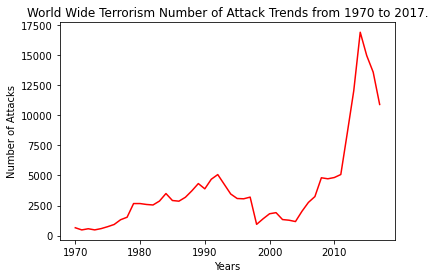

In [11]:
sns.lineplot(x='iyear', y='count', data=yearly_attacks, color= "red")
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.title('World Wide Terrorism Number of Attack Trends from 1970 to 2017.')
plt.show()

In [12]:
yearly_attacks_region = gtd_df.groupby(['iyear', 'region_txt']).size().reset_index(name='count')

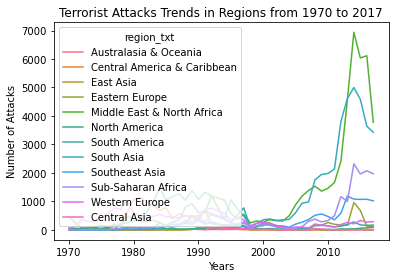

In [13]:
sns.lineplot(x='iyear', y='count',hue='region_txt', data=yearly_attacks_region )
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

In [14]:
country_attacks = gtd_df.groupby('country_txt').size().reset_index(name='count').sort_values(by='count', ascending = False)
top5_country = country_attacks.head(5)

### Barplot

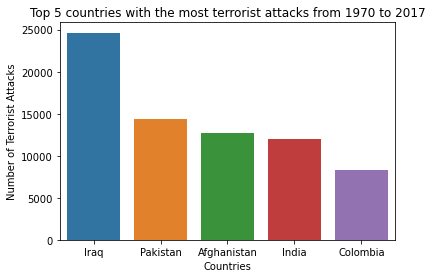

In [15]:
sns.barplot(x='country_txt', y='count', data=top5_country)
plt.title('Top 5 countries with the most terrorist attacks from 1970 to 2017')
plt.xlabel('Countries')
plt.ylabel('Number of Terrorist Attacks')
plt.show()

In [16]:
narrow_2017 = gtd_df[gtd_df['iyear'] >= 2012]
narrow_2017_count = narrow_2017.groupby(['iyear', 'country_txt']).size().reset_index(name='count')

# Get the top 5 countries for each year
narrow_2017_count_5 = narrow_2017_count.groupby('iyear').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

#### Attacks in few countries

<AxesSubplot:xlabel='iyear', ylabel='count'>

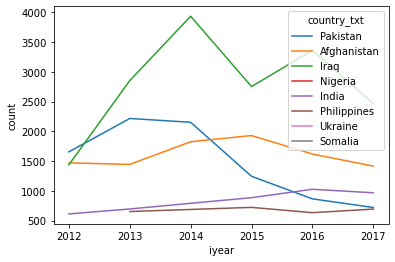

In [17]:
sns.lineplot(x='iyear', y='count', hue='country_txt', data=narrow_2017_count_5)

In [18]:
gtd_df.head(1)

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0


## World Wide Outcome of a terrorist attack

In [19]:
total_count = gtd_df['success'].count()
success = gtd_df.groupby('success').size().reset_index(name="count")
success['percentage'] = (success['count'] / total_count) * 100

In [20]:
success

,success,count,percentage
0,0,20059,11.040173
1,1,161632,88.959827


Text(0.5, 1.0, 'Success rate of Terrorist attacks from 2012 to 2017')

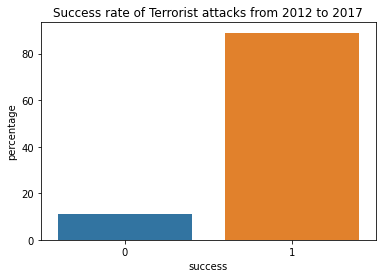

In [21]:
sns.barplot(x='success', y= 'percentage',data = success)
plt.title('Success rate of Terrorist attacks from 2012 to 2017')

In [22]:
attack_type = gtd_df.groupby(['attacktype1_txt', 'success']).size().reset_index(name="count")
attack_type

,attacktype1_txt,success,count
0,Armed Assault,0,2324
1,Armed Assault,1,40345
2,Assassination,0,4697
3,Assassination,1,14615
4,Bombing/Explosion,0,10725
5,Bombing/Explosion,1,77530
6,Facility/Infrastructure Attack,0,577
7,Facility/Infrastructure Attack,1,9779
8,Hijacking,0,80
9,Hijacking,1,579


Text(0, 0.5, 'Number of Attacks')

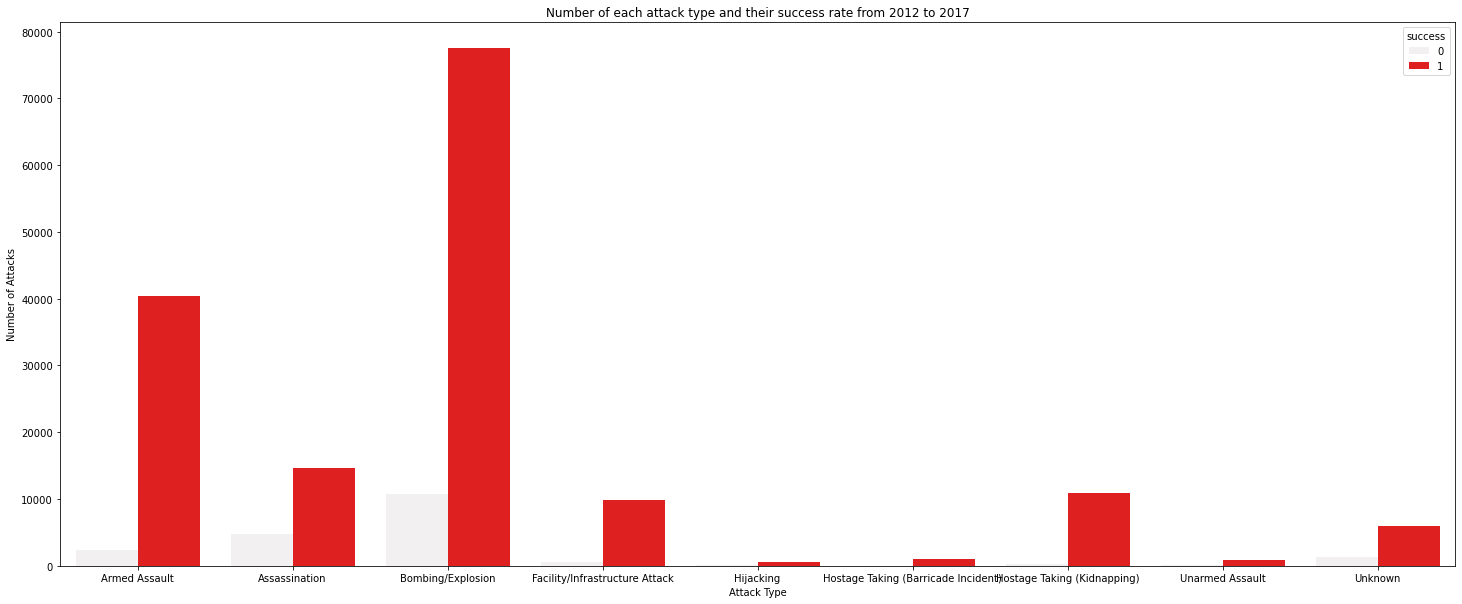

In [23]:
plt.figure(figsize=(25,10))
plt.title('Number of each attack type and their success rate from 2012 to 2017')
sns.barplot(x='attacktype1_txt', y='count', hue='success', data=attack_type, color= "red")
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')

## Casualties due to Terrorist Attacks

In [24]:
nkills_attack = gtd_df.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkills_attack

,attacktype1_txt,nkill
0,Armed Assault,160297.0
1,Assassination,24920.0
2,Bombing/Explosion,157321.0
3,Facility/Infrastructure Attack,3642.0
4,Hijacking,3718.0
5,Hostage Taking (Barricade Incident),4478.0
6,Hostage Taking (Kidnapping),24231.0
7,Unarmed Assault,880.0
8,Unknown,32381.0


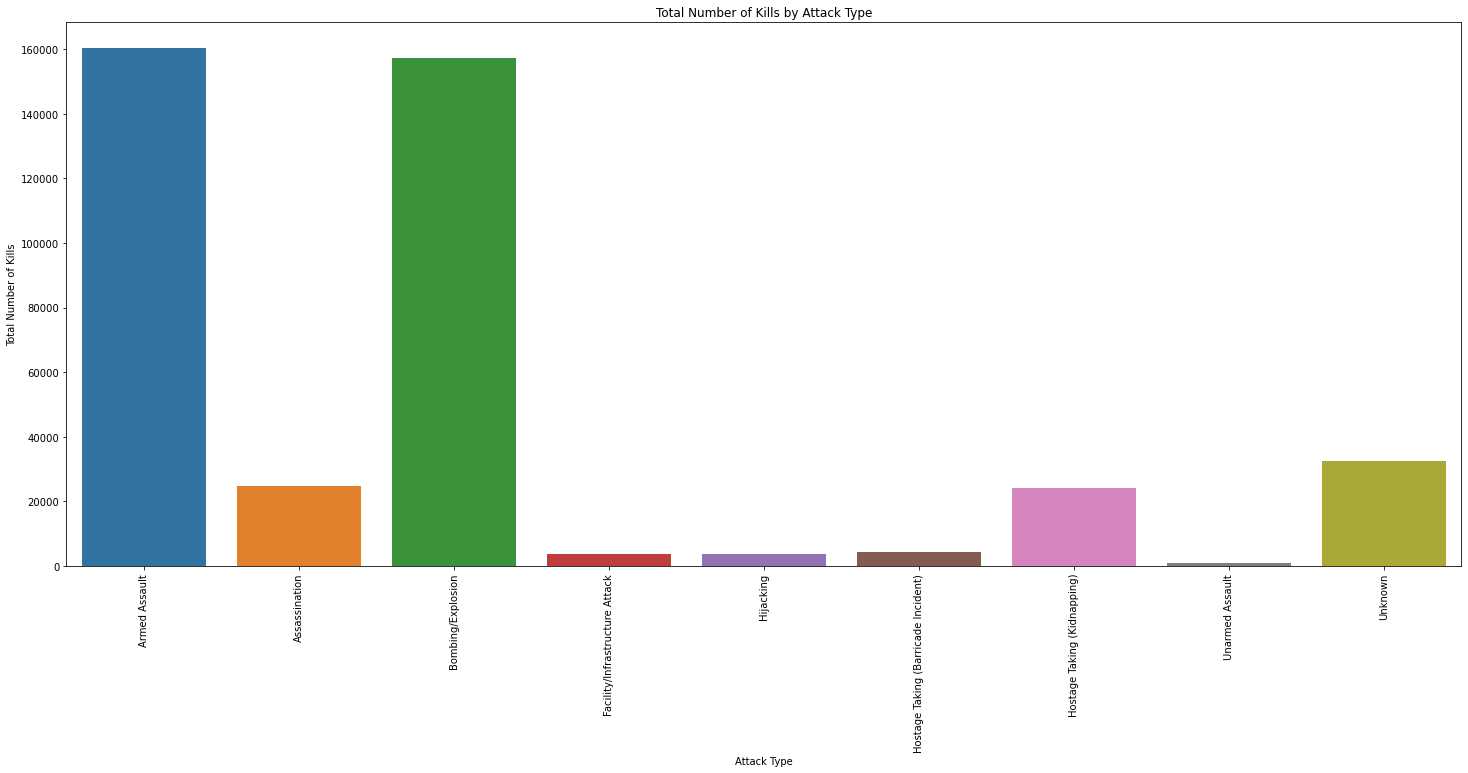

In [25]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkills_attack)
plt.xlabel('Attack Type')
plt.ylabel('Total Number of Kills')
plt.title('Total Number of Kills by Attack Type')
plt.xticks(rotation=90)
plt.show()

In [26]:
mycountries = gtd_df[(gtd_df['country_txt'] == 'Mexico') | (gtd_df['country_txt'] == 'Japan')]
mycountries.head(1)

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
1,197000000002,1970,1,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0


In [27]:
gtd.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','propextent_txt':'Property_Damage','motive':'Motive'},inplace=True)
gtd=gtd[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive',"Property_Damage",'success']]
gtd['casualities']=gtd['Killed']+gtd['Wounded']
gtd.head(10)


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Property_Damage,success,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,NaN,1,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,NaN,1,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,NaN,1,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN,1,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN,1,NaN
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,Minor (likely < $1 million),1,0.0
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,NaN,0,0.0
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,Minor (likely < $1 million),1,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,Minor (likely < $1 million),1,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,Minor (likely < $1 million),1,0.0


## Terrorist Attacks in India

In [28]:
india = gtd_df[(gtd_df['country_txt'] =='India')]
num_ofattacks = india.groupby('iyear').size().reset_index(name="count")
num_ofattacks

,iyear,count
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20
5,1980,10
6,1981,16
7,1982,13
8,1983,47
9,1984,159


In [29]:
mex_sumattacks = num_ofattacks['count'].sum()
mex_sumattacks
print('Total Number of attacks in India are', mex_sumattacks)

Total Number of attacks in India are 11960


<AxesSubplot:title={'center':'Yearly Trend of Terrorist Attcks in India from 1974 t0 2017'}, xlabel='Year', ylabel='Number of Attacks'>

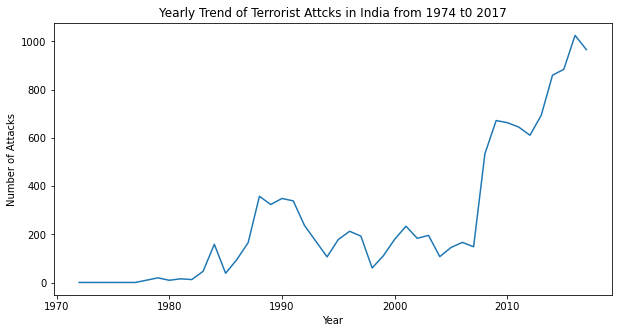

In [30]:
plt.figure(figsize=(10,5))
plt.title("Yearly Trend of Terrorist Attcks in India from 1974 t0 2017")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
sns.lineplot(x="iyear", y="count", data=num_ofattacks)

In [31]:
succ_mex = india.groupby(['success']).size().reset_index(name='count')
succ_mex['percentage'] = succ_mex['count']/ mex_sumattacks *100
succ_mex

,success,count,percentage
0,0,1680,14.046823
1,1,10280,85.953177


Text(0.5, 0, 'Outcome')

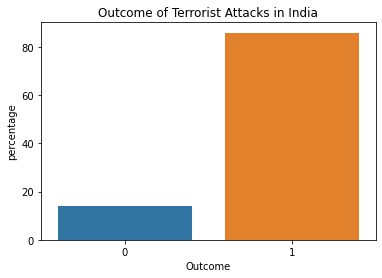

In [32]:
sns.barplot(x = 'success', y = 'percentage', data=succ_mex)
plt.title("Outcome of Terrorist Attacks in India")
plt.xlabel("Outcome")

In [33]:
india_atype= india.groupby(['attacktype1_txt','success']).size().reset_index(name='count')
india_atype

,attacktype1_txt,success,count
0,Armed Assault,0,244
1,Armed Assault,1,2940
2,Assassination,0,228
3,Assassination,1,1001
4,Bombing/Explosion,0,1128
5,Bombing/Explosion,1,3697
6,Facility/Infrastructure Attack,0,33
7,Facility/Infrastructure Attack,1,963
8,Hijacking,0,4
9,Hijacking,1,39


Text(0.5, 0, 'Attack Type')

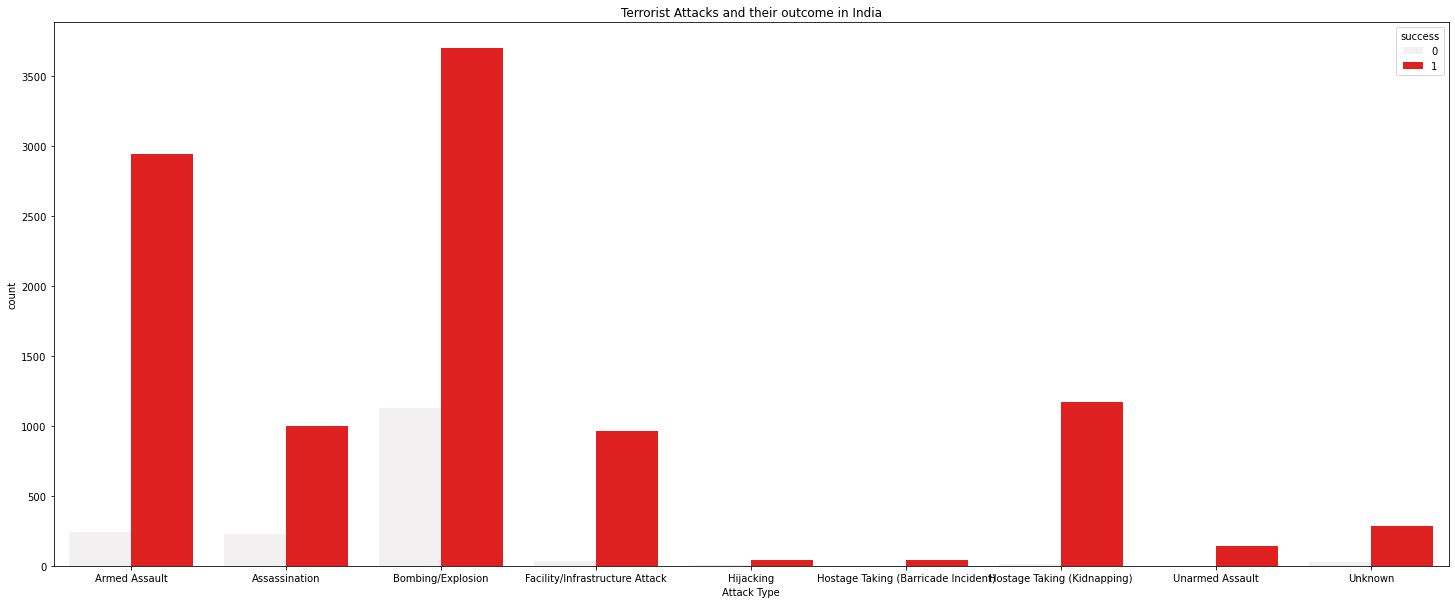

In [34]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='count', hue= 'success', data=india_atype, color="red")
plt.title("Terrorist Attacks and their outcome in India")
plt.xlabel("Attack Type")

In [35]:
nkillattack_mex = india.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkillattack_mex

,attacktype1_txt,nkill
0,Armed Assault,9378.0
1,Assassination,2001.0
2,Bombing/Explosion,5830.0
3,Facility/Infrastructure Attack,135.0
4,Hijacking,42.0
5,Hostage Taking (Barricade Incident),136.0
6,Hostage Taking (Kidnapping),819.0
7,Unarmed Assault,28.0
8,Unknown,972.0


Text(0.5, 0, 'Attack type')

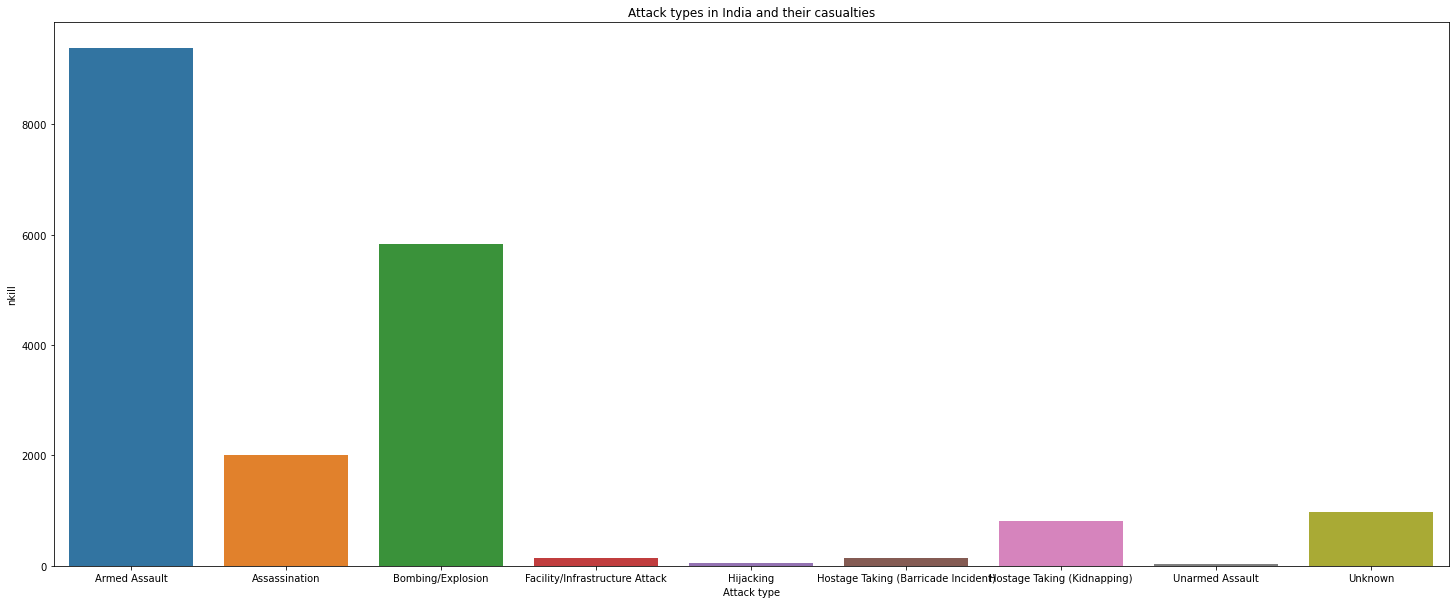

In [36]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkillattack_mex)
plt.title("Attack types in India and their casualties")
plt.xlabel("Attack type")


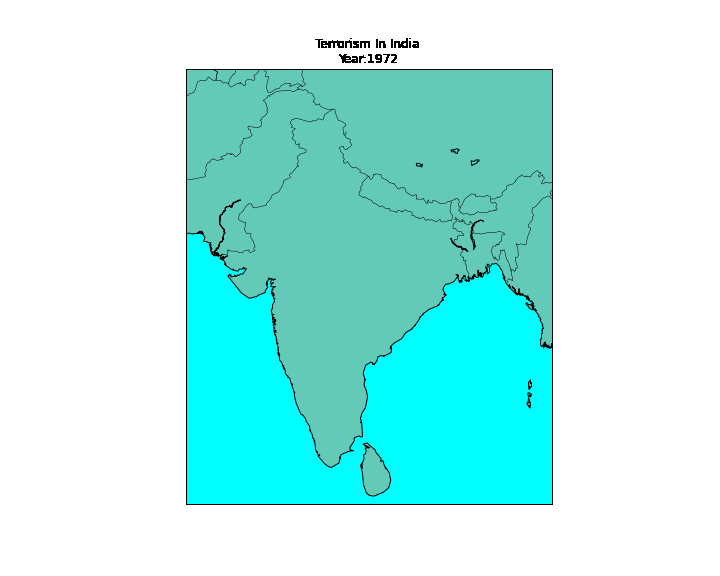

In [37]:
terror_india = gtd[gtd['Country'] == 'India']
fig = plt.figure(figsize=(10, 8))

def animate(Year):
    ax = plt.gca()
    ax.clear()
    ax.set_title('Terrorism In India ' + '\n' + 'Year:' + str(Year))
    
    m5 = Basemap(projection='lcc', resolution='l', llcrnrlon=67, llcrnrlat=5, urcrnrlon=99, urcrnrlat=37, lat_0=28, lon_0=77)
    
    lat_gif = list(terror_india[terror_india['Year'] == Year].latitude)
    long_gif = list(terror_india[terror_india['Year'] == Year].longitude)
    x_gif, y_gif = m5(long_gif, lat_gif)
    
  
    sizes = [killed + wounded for killed, wounded in zip(terror_india[terror_india['Year'] == Year].Killed, terror_india[terror_india['Year'] == Year].Wounded)]

    m5.scatter(x_gif, y_gif, s=sizes, color='r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral', lake_color='aqua', zorder=1, alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')

ani = animation.FuncAnimation(fig, animate, frames=list(terror_india.Year.unique()), interval=1500)

ani.save('animation.gif', writer='pillow', fps=1)
plt.close(fig)

filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)

HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


## Terrorist Attacks in Japan

In [38]:
japan = gtd_df[(gtd_df['country_txt'] == 'Japan')]
japan.head(1)

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
4,197001000003,1970,1,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,0.0


In [39]:
japan_attacks = japan['eventid'].count()
print('There were',japan_attacks ,'attacks in Japan.')

There were 402 attacks in Japan.


In [40]:
japan_success = japan.groupby('success').size().reset_index(name='count')
japan_success['percentage'] = japan_success['count'] / japan_attacks * 100
japan_success

,success,count,percentage
0,0,61,15.174129
1,1,341,84.825871


Text(0.5, 0, 'Outcome')

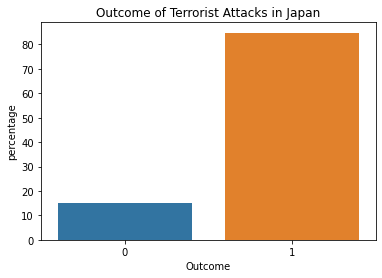

In [41]:
sns.barplot(x='success', y='percentage', data = japan_success)
plt.title("Outcome of Terrorist Attacks in Japan")
plt.xlabel("Outcome")

In [42]:
attack_types_japan = japan.groupby(['attacktype1_txt','success']).size().reset_index(name='count')
attack_types_japan

,attacktype1_txt,success,count
0,Armed Assault,0,2
1,Armed Assault,1,45
2,Assassination,0,9
3,Assassination,1,13
4,Bombing/Explosion,0,19
5,Bombing/Explosion,1,109
6,Facility/Infrastructure Attack,0,13
7,Facility/Infrastructure Attack,1,149
8,Hijacking,1,3
9,Hostage Taking (Barricade Incident),1,3


Text(0.5, 1.0, 'Facility ')

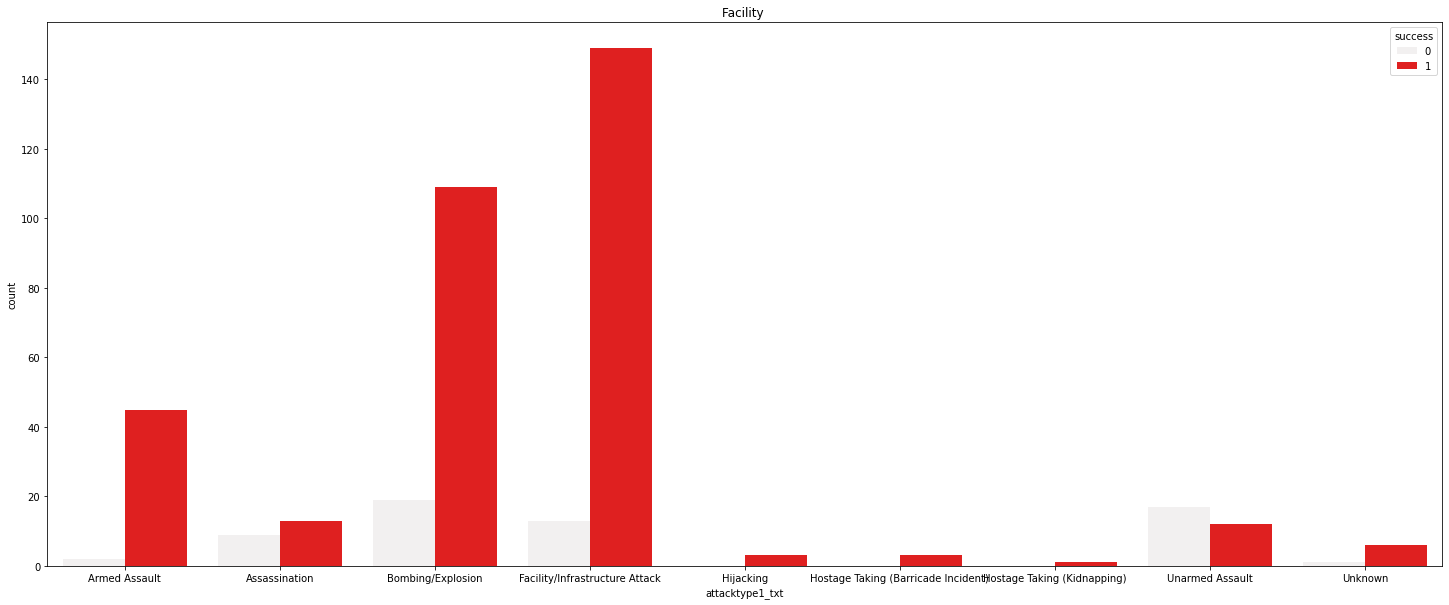

In [43]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='count', hue='success', data=attack_types_japan, color = "red")
plt.title("Facility ")

In [44]:
nkills_japan = japan.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkills_japan

,attacktype1_txt,nkill
0,Armed Assault,3.0
1,Assassination,7.0
2,Bombing/Explosion,6.0
3,Facility/Infrastructure Attack,5.0
4,Hijacking,0.0
5,Hostage Taking (Barricade Incident),19.0
6,Hostage Taking (Kidnapping),0.0
7,Unarmed Assault,23.0
8,Unknown,3.0


<AxesSubplot:xlabel='attacktype1_txt', ylabel='nkill'>

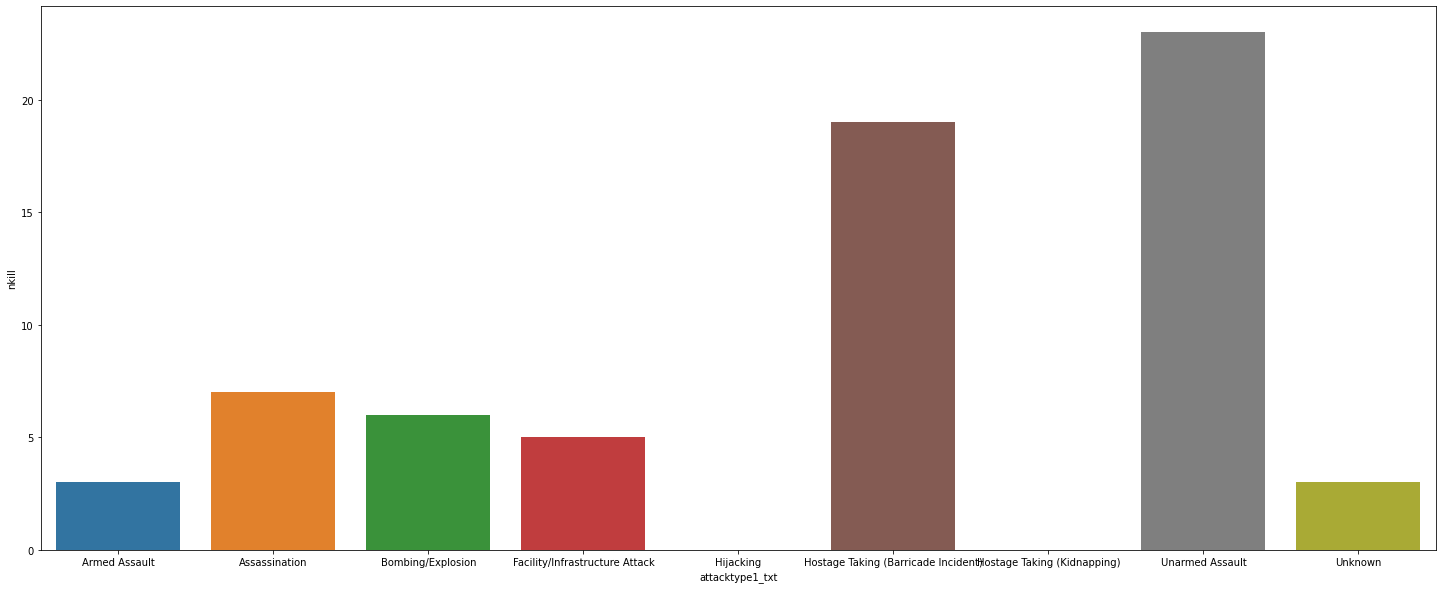

In [45]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkills_japan)


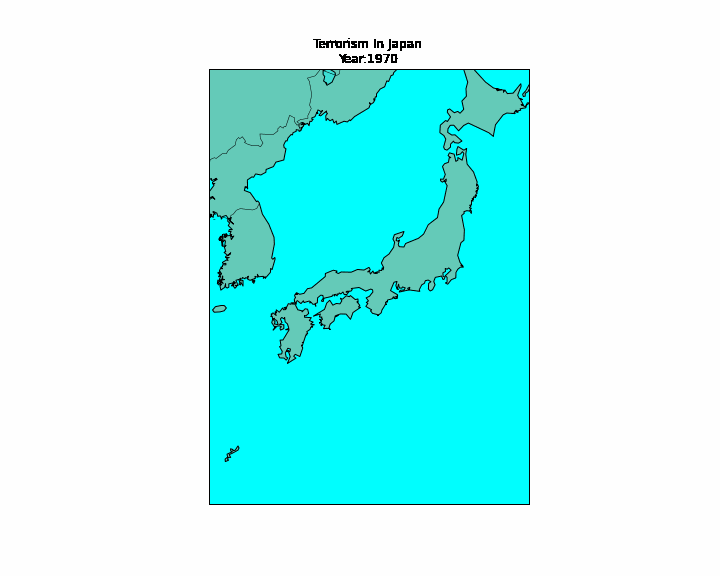

In [46]:
terror_japan = gtd[gtd['Country'] == 'Japan']
fig = plt.figure(figsize=(10, 8))

def animate(Year):
    ax = plt.gca()
    ax.clear()
    ax.set_title('Terrorism In Japan ' + '\n' + 'Year:' + str(Year))
    
    m5 = Basemap(projection='lcc', resolution='l', llcrnrlon=127, llcrnrlat=24, urcrnrlon=146, urcrnrlat=45, lat_0=36.5, lon_0=136)
    
    lat_gif = list(terror_japan[terror_japan['Year'] == Year].latitude)
    long_gif = list(terror_japan[terror_japan['Year'] == Year].longitude)
    x_gif, y_gif = m5(long_gif, lat_gif)
    
    
    sizes = [killed + wounded for killed, wounded in zip(terror_japan[terror_japan['Year'] == Year].Killed, terror_japan[terror_japan['Year'] == Year].Wounded)]
    

    m5.scatter(x_gif, y_gif, s=sizes, color='r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral', lake_color='aqua', zorder=1, alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')

ani = animation.FuncAnimation(fig, animate, frames=list(terror_japan.Year.unique()), interval=1500)


ani.save('animation_japan.gif', writer='pillow', fps=1)
plt.close(fig)

filename = 'animation_japan.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)

HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


## Global terrorist attacks

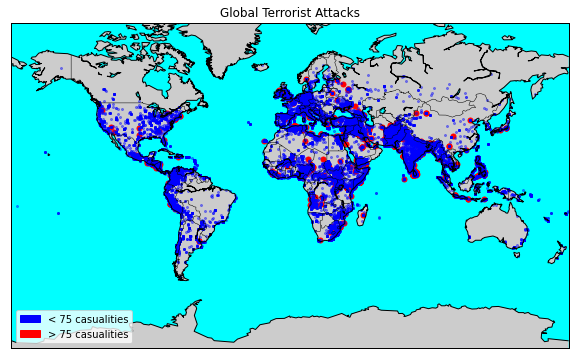

In [47]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(gtd[gtd['casualities']>=75].latitude)
long_100=list(gtd[gtd['casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(gtd[gtd['casualities']<75].latitude)
long_=list(gtd[gtd['casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()


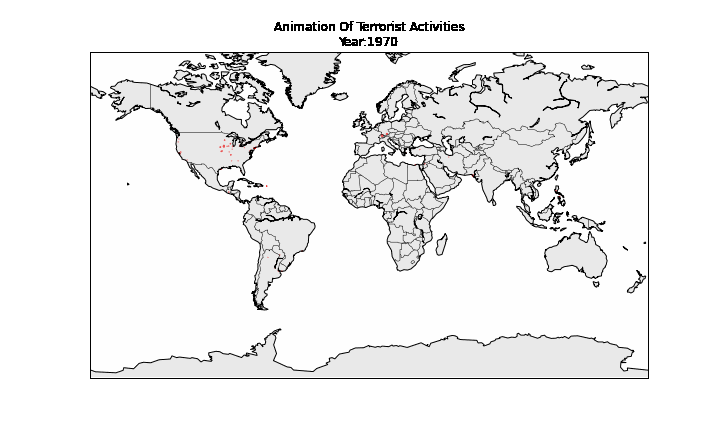

In [48]:
fig = plt.figure(figsize=(10, 6))

def animate(Year):
    ax = plt.gca()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities' + '\n' + 'Year:' + str(Year))
    
    m6 = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
    
    lat6 = list(gtd[gtd['Year'] == Year].latitude)
    long6 = list(gtd[gtd['Year'] == Year].longitude)
    x6, y6 = m6(long6, lat6)
    
   
    sizes = [(kill + wound) * 0.1 for kill, wound in zip(gtd[gtd['Year'] == Year].Killed, gtd[gtd['Year'] == Year].Wounded)]
    
    m6.scatter(x6, y6, s=sizes, color='r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder=1, alpha=0.4)
    m6.drawmapboundary()

ani = FuncAnimation(fig, animate, frames=list(gtd.Year.unique()), interval=1500)


ani.save('animation.gif', writer='pillow', fps=1)
plt.close(fig)


filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


## Decision tree

Accuracy using the default gini impurity criterion: 0.7950509461426492


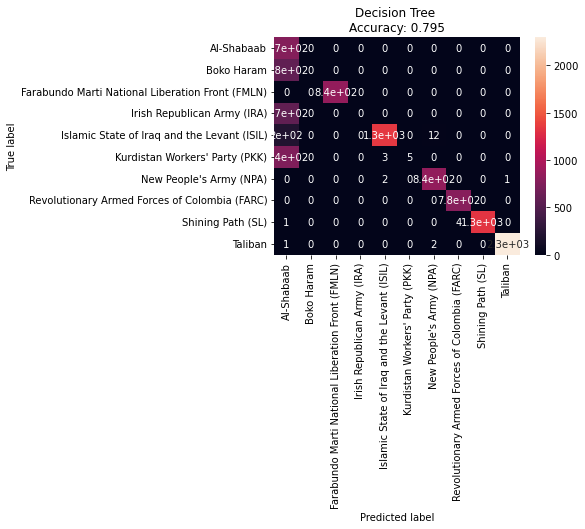

In [49]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


x_features = ["Year", "Region", "Country", "AttackType", "casualities", "Target_type", "Weapon_type"]
y_features = ["Group"]


terrortop10 = gtd[gtd['Group'].isin(gtd['Group'].value_counts()[1:11].index)]


X = terrortop10[x_features]
Y = terrortop10[y_features]


X.columns = X.columns.str.replace(' ', '')
Y.columns = Y.columns.str.replace(' ', '')


X_onehot = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X_onehot, Y, test_size=0.33, random_state=15)


X_train.columns = X_train.columns.str.replace(' ', '')
X_test.columns = X_test.columns.str.replace(' ', '')


X_train.dropna(inplace=True)
y_train = y_train[y_train.index.isin(X_train.index)]
X_test.dropna(inplace=True)
y_test = y_test[y_test.index.isin(X_test.index)]


clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)


print('Accuracy using the default gini impurity criterion:', clf.score(X_test, y_test))


y_dectree_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_dectree_pred)


cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)


plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy: {:.3f}'.format(accuracy_score(y_test, y_dectree_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Random forest

Accuracy 0.993886462882096


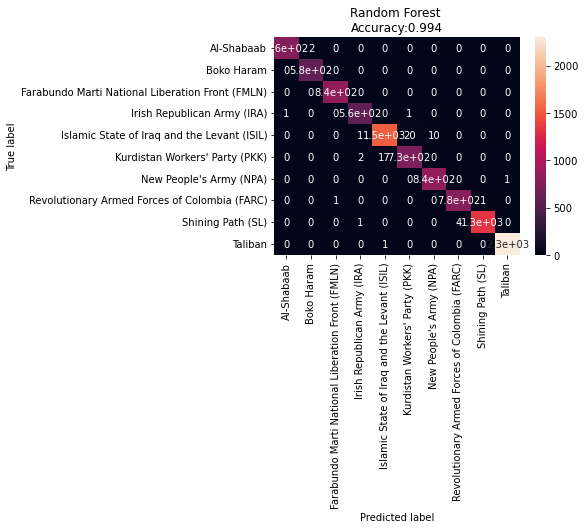

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
model3 = RandomForestClassifier()

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print('Accuracy',model3.score(X_test,y_test))

cm = confusion_matrix(y_test, y_pred) 


cm_df = pd.DataFrame(cm,
                     index = model3.classes_, 
                     columns = model3.classes_)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

estimator = model3.estimators_[2]
export_graphviz(estimator, out_file='tree_limited.dot')
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=300



## Conclusion

Terrorism Attacks all around the world is becoming increasingly a problem! the number of terrorist attacks in the Middle East and North Africa and South America increased significantly. 89% of attacks have been successful, with armed asssault being the most used terrorist attacks and armed assault and bombing/ explosion causing the most casualties.